# Hand Gesture Recognition Model

In [4]:
#import libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Path to dataset

In [9]:
DATA_DIR = "LeapGestRecog"  
IMG_SIZE = 64

images, labels = [], []
classes = []

for subject in os.listdir(DATA_DIR):
    subject_path = os.path.join(DATA_DIR, subject)
    if not os.path.isdir(subject_path):
        continue
    
    for gesture in os.listdir(subject_path):
        gesture_path = os.path.join(subject_path, gesture)
        if not os.path.isdir(gesture_path):
            continue
        
        if gesture not in classes:
            classes.append(gesture)
        
        label = classes.index(gesture)
        
        for file in os.listdir(gesture_path):
            file_path = os.path.join(gesture_path, file)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            images.append(img)
            labels.append(label)

images = np.array(images, dtype="float32").reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
labels = np.array(labels, dtype="int")

print("Dataset loaded:", images.shape, labels.shape)
print("Number of classes:", len(classes), classes)

Dataset loaded: (20000, 64, 64, 1) (20000,)
Number of classes: 10 ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']


# Train-Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (16000, 64, 64, 1) (16000, 10)
Test set: (4000, 64, 64, 1) (4000, 10)


# Build CNN Model

In [11]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\Sayantika\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,914 (2.61 MB)

 Trainable params: 683,914 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

# Train Model

In [13]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 81ms/step - accuracy: 0.9078 - loss: 0.2787 - val_accuracy: 0.9987 - val_loss: 0.0045
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.9923 - loss: 0.0265 - val_accuracy: 0.9995 - val_loss: 0.0019
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 42s 83ms/step - accuracy: 0.9964 - loss: 0.0117 - val_accuracy: 0.9998 - val_loss: 9.5390e-04
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 42s 83ms/step - accuracy: 0.9995 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 1.1057e-04
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 81ms/step - accuracy: 0.9965 - loss: 0.0102 - val_accuracy: 1.0000 - val_loss: 3.5370e-04
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 80ms/step - accuracy: 0.9964 - loss: 0.0106 - val_accuracy: 0.9998 - val_loss: 8.2920e-04
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 86ms/step - accuracy: 0.9989 - loss: 0.0028 - val_accuracy: 0.9998 - val_loss: 3.3338e-04
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 80ms/step - accuracy: 0.99

# Evaluate Model

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9998 - loss: 0.0018
Test Accuracy: 99.98%


# Plot Training Curves

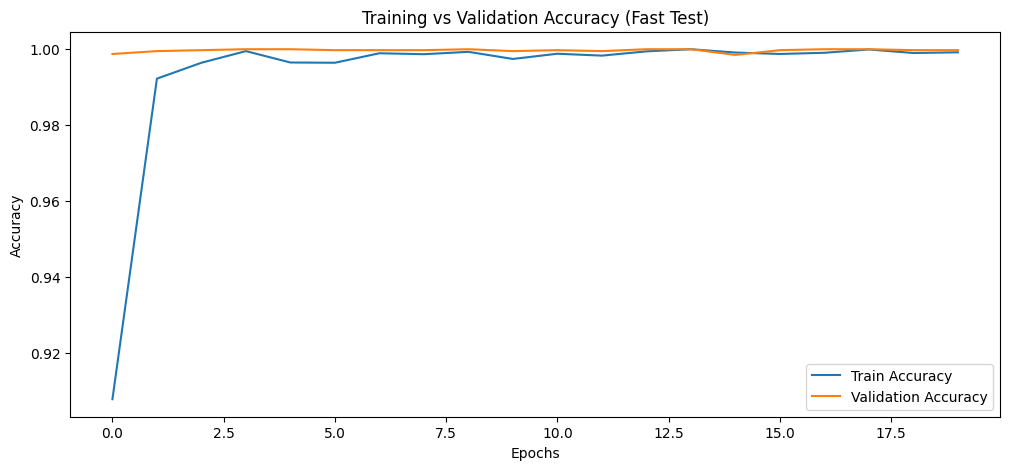

In [15]:
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy (Fast Test)")
plt.legend()
plt.show()

In [16]:
model.save("handGesture_model.keras")
print("Model Trained and Saved Successfully!")

Model Trained and Saved Successfully!


In [17]:
print(os.listdir())

['.ipynb_checkpoints', 'gesture.ipynb', 'handGesture.ipynb', 'handGesture_model.keras', 'leapGestRecog']


In [18]:
model = load_model("handGesture_model.keras")
print("Model loaded successfully!")

Model loaded successfully!
